# 🧠 Etki Büyüklüğü: Fark Gerçekten Önemli mi?

## Giriş: İstatistiksel Anlamlılık Yeterli Değil

Diyelim ki:
- Bir ilacın etkisini test ettin
- p-değeri < 0.05 → fark var
- Ama bu fark gerçekten **önemli mi**?

> “Sayılar anlamlı olabilir ama pratikte önemsiz kalabilir.  
İşte o zaman etki büyüklüğüne bakmalısın.”  

## 🔍 Etki Büyüklüğü Nedir?

**Etki büyüklüğü**, farkın **ne kadar büyük olduğunu** ölçer.  
p-değeri sadece farkın şans eseri olmadığını söyler.  
AMA:

> “Bu fark kullanıcıya ya da karar vericiye göre ne kadar etkili?”

Bunu söylemek için **etki büyüklüğü** gerekir.

📌 Örnek:
- Tasarım değişikliğiyle dönüşüm oranı arttı → ama %0.1 artış mı? %10 artış mı?
- Yeni eğitim yöntemiyle notlar yükseldi → ama 2 puan mı? 20 puan mı?

## 📐 Etki Büyüklüğü Türleri

| Yöntem | Kullanım Durumu |
|--------|----------------|
| **Cohen’s d** | İki grubun ortalamaları arası fark |
| **Pearson r** | Korelasyon temelli etki ölçüsü |
| **Eta-squared (η²)** | ANOVA sonrası açıklama gücü |
| **Odds Ratio / Risk Ratio** | Kategorik verilerde fark ölçümleme |

📌 Biz burada en yaygın olan iki tanesine odaklanacağız:
- **Cohen’s d**
- **r korelasyonu olarak etki büyüklüğü**

## 🛠️ Cohen's d: Ortalama Arasındaki Farkı Standartlaştır

### Formülü:
$$
d = \frac{\bar{x}_1 - \bar{x}_2}{s}
$$

Burada `s`, her iki grubun standart sapmasının birleştirilmiş halidir.

### Python Kodu:

In [1]:
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    var_pooled = ((n1 - 1) * np.var(group1, ddof=1) + (n2 - 1) * np.var(group2, ddof=1)) / (n1 + n2 - 2)
    return mean_diff / np.sqrt(var_pooled)


In [3]:
#ornek veri oluşturma
import numpy as np

np.random.seed(42)
grup1 = np.random.normal(loc=75, scale=10, size=30)
grup2 = np.random.normal(loc=80, scale=10, size=30)

print("Cohen’s d:", cohen_d(grup1, grup2))

Cohen’s d: -0.6191906697348889



📌 Bu değer **orta düzeyde bir fark** anlamına gelir.

## 📊 Cohen’s d Yorumlama Tablosu

| d değeri | Yorum |
|----------|--------|
| 0.2      | Küçük etki |
| 0.5      | Orta etki |
| 0.8      | Büyük etki |

📌 Bu sınırlamalar genel bir rehberdir.  
Gerçek hayatta bağlama göre yorum değişebilir.

## 📈 Grafiksel Gösterim: Gruplar Nasıl Farklı?

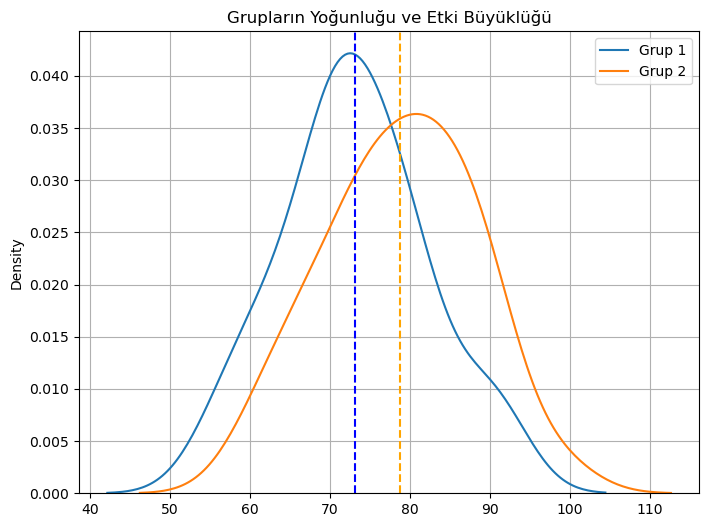

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.kdeplot(grup1, label="Grup 1")
sns.kdeplot(grup2, label="Grup 2")
plt.title("Grupların Yoğunluğu ve Etki Büyüklüğü")
plt.axvline(np.mean(grup1), color='blue', linestyle='--')
plt.axvline(np.mean(grup2), color='orange', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

📌 Bu grafikte dağılımların nasıl ayrıldığını görebilirsin.  
Ve Cohen’s d ile farkı sayısal olarak ifade edebilirsin.

## 🧪 Pearson r Olarak Etki Büyüklüğü

Korelasyon katsayısı da aslında **etki büyüklüğüdür.**

| r değeri | Yorum |
|----------|--------|
| 0.1      | Zayıf ilişki |
| 0.3      | Orta ilişki |
| 0.5      | Güçlü ilişki |

### Python Kodu:

In [6]:
from scipy.stats import pearsonr

r, p = pearsonr(grup1, grup2)
print(f"Pearson r: {r:.2f}")

Pearson r: 0.10


📌 Örneğin:
- `r = 0.7` → güçlü pozitif ilişki
- `r = -0.3` → zayıf negatif ilişki

📌 **Küçük r değerleri** genellikle düşük bir etki büyüklüğünü temsil eder ve bu durumda, bağımsız değişkenin bağımlı değişken üzerindeki etkisi çok azdır.
- `r = 0.10` → çok zayıf bir ilişki


## 📉 Etki Büyüklüğü Ne Söyler?

| Konu | Açıklama |
|------|----------|
| ✅ **Pratik anlamlılık** | Fark gerçekten önemli mi? |
| ✅ **Karşılaştırma aracı** | Hangi tasarım daha güçlü etki yaratıyor? |
| ✅ **Meta analizlerde kullanılır** | Birden fazla çalışmayı karşılaştırmak için |
| ✅ **Güç analizi için gereklidir** | Kaç kişiye bakmalıyım sorusuna cevap verir |

📌 Model kuruyorsun ama etki büyüklüğü bilmiyorsan → modelin anlamsızdır.

## 📋 Etki Büyüklüğü ve Hipotez Testi Bağlantısı

| Karar | Etki Büyüklüğü | Açıklama |
|--------|----------------|-----------|
| p < 0.05, d küçük | ❌ Pratikte önemsiz | İstatistiksel fark var ama gerçek hayatta farketmez |
| p < 0.05, d büyük | ✅ Hem istatistiksel hem pratik fark var |
| p > 0.05, d büyük | ⚠️ Potansiyel fark var ama örneklem küçük olabilir |
| p > 0.05, d küçük | ❌ Fark yok → işe yaramıyor |

📌 Bu tablo, **yalnızca p-değerine değil**,  
ayrıca **etki büyüklüğüne de bakman gerektiğini** gösterir.

## 🧩 Gerçek Hayatta Uygulamalar

| Alan | Açıklama |
|------|----------|
| **Eğitim** | Yeni bir öğretim yönteminin etkisi |
| **Sağlık** | Tedavi A vs Tedavi B |
| **Pazarlama** | Yeni kampanya dönüşümü artırıyor mu? |
| **Veri Bilimi** | Özelliklerin model üzerindeki etkisi |

📌 Veri biliminde yüksek korelasyonlu ama düşük etki büyüklüğüne sahip bir değişken → çıkarılmalı  
Yüksek etki büyüklüğü ama düşük korelasyon → dikkatle değerlendirilmeli